In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
from utils import load_and_clean_data,normalize 
from utils import compare_datasets , compute_common_states , quantize_valves, compute_ccdf

In [15]:
sensor_cols = [
    # Flow transmitters + converted rates
    "DM-FT01", "DM-FT01Z",
    "DM-FT02", "DM-FT02Z",
    "DM-FT03", "DM-FT03Z",
    # Level
    "DM-LIT01",
    # Pressure
    "DM-PIT01", "DM-PIT02",
    # Temperatures (main/heat tanks)
    "DM-TIT01", "DM-TIT02",
    # Tank temperatures & extra pressure
    # "DM-TWIT-03", "DM-TWIT-04", "DM-TWIT-05",
    # "DM-PWIT-03",
    # "DM-LSH-03", "DM-LSH-04", "DM-LSH01", "DM-LSH02",
    # "DM-LSL-04", "DM-LSL01", "DM-LSL02"
]
actuators =  [
    "DM-FCV01-Z", "DM-FCV02-Z", "DM-FCV03-Z",
    "DM-LCV01-Z",
    "DM-PCV01-Z", "DM-PCV02-Z",

    "DM-PP01A-R",  # main pump A running
    "DM-PP01B-R",  # main pump B running
    "DM-PP02-R"    # heating-water pump running

    "DM-PP04-AO"   # cooling water pump speed (Hz)
]

In [16]:
train_files = sorted(glob("../haiend-23.05/end-train1.csv"))
test_files = sorted(glob("../haiend-23.05/end-test1.csv"))
label_files = sorted(glob("../haiend-23.05/label-test1.csv"))


In [17]:
train_df, test_df = load_and_clean_data(train_files, test_files, attack_cols=None, label_files=label_files)


=== Step 1: Loading & Cleaning Data ===
Loading ../haiend-23.05/end-train1.csv...
  Original shape: (280800, 226)
Loading ../haiend-23.05/end-test1.csv...
  Original shape: (54000, 226)
  No attack columns provided, skipping attack removal
Loading labels from ../haiend-23.05/label-test1.csv...
  Attack rows in labels: 2981
  Labels merged. Test shape: (54000, 227)
  After removing attack rows: (26978, 227)
Final training data shape: (280800, 225)
Final test data shape: (26978, 225)


In [18]:
# return normalized sensors only
train_normalized, test_normalized = normalize(train_df[sensor_cols], test_df[sensor_cols])


===Normalizing & Quantizing (Q=None) ===
Data ranges before normalization:
  Train: min=0.31, max=3190.00
  Test: min=0.31, max=3174.74


In [19]:
# 1a Computing K-S statistics of sensor values
ks_statistics_without_states = compare_datasets(train_normalized, test_normalized)

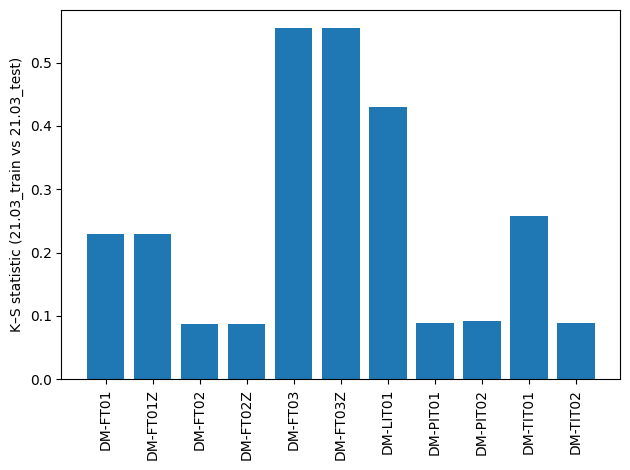

In [20]:
plt.bar(range(len(ks_statistics_without_states)), list(ks_statistics_without_states.values()))
plt.xticks(range(len(ks_statistics_without_states)), list(ks_statistics_without_states.keys()), rotation=90)
plt.ylabel("K–S statistic (21.03_train vs 21.03_test)")
plt.tight_layout()
plt.show()

In [ ]:
# 1b Extending code to calculate system states
a_train_df = train_df.copy()
a_test_df = test_df.copy()

a_train_df = quantize_valves(a_train_df, actuators, ignore=[], step=5) # mutating df
print(a_train_df[actuators])
a_test_df = quantize_valves(a_test_df, actuators, ignore=[], step=5) # mutating df


TypeError: argument of type 'NoneType' is not iterable